$\textbf{IE529 Computational Assignment 1 Question 1}$

$\textbf{Principal Component Analysis}$

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
#Reading the data
data=pd.read_csv('CompPCA.csv',names=['Sepal Length', 'Sepal Width', 'Petal Length','Petal Width'])

In [24]:
#Data with 150 samples and 4 features
data

,Sepal Length,Sepal Width,Petal Length,Petal Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


$\textbf{Question 1 Part 1 }$

$\textbf{Performing the PCA }$

In [22]:
#Question 1 Part 1

#De-mean the data using coloumn means 
De_mean= data- data.mean(axis = 0)

#Scaling the data by sqrt(n-1)
X = 1/np.sqrt(149)*De_mean

#Computing the covariance matrix X^T.X
cov = np.dot(np.transpose(X),X)

#Computing the eigen values and eigen vectors for covariance matrix
eig_val,eig_vecs = np.linalg.eig(cov)

#The eigen vectors of the covariance matrix for the de-meaned data give the Principal components 
print ('First Principal component is:\n', eig_vecs[:,0])
print ('\nSecond Principal component is:\n', eig_vecs[:,1])
print ('\nThird Principal component is:\n', eig_vecs[:,2])
print ('\nFourth Principal component is:\n', eig_vecs[:,3])

First Principal component is:
 [ 0.36158968 -0.08226889  0.85657211  0.35884393]

Second Principal component is:
 [-0.65653988 -0.72971237  0.1757674   0.07470647]

Third Principal component is:
 [-0.58099728  0.59641809  0.07252408  0.54906091]

Fourth Principal component is:
 [ 0.31725455 -0.32409435 -0.47971899  0.75112056]


$\textbf{Matrix with 4 PCs and their associated variances}$

In [65]:
#Matrix with four PCs
print ('Matrix with 4 PCs:\n', eig_vecs)

Matrix with 4 PCs:
 [[ 0.36158968 -0.65653988 -0.58099728  0.31725455]
 [-0.08226889 -0.72971237  0.59641809 -0.32409435]
 [ 0.85657211  0.1757674   0.07252408 -0.47971899]
 [ 0.35884393  0.07470647  0.54906091  0.75112056]]


In [63]:
#Eigenvalues of the Covariance matrix
#Variance in the Principal components
print ('Eigenvalues of the Covariance Matrix are:', eig_val)

Eigenvalues of the Covariance Matrix are: [ 4.22484077  0.24224357  0.07852391  0.02368303]


$\textbf{Question 1 Part 2 }$

$\textbf{Portion of variance in each of the PCs }$

In [50]:
#Question 1 Part 2
#Portion of the variance contained in each of the PCs

'''
Ratio of each eigen value to the total sum of all eigen values 
gives portion of variance explained by each PC
'''

var_portion = eig_val/eig_val.sum()

print ('Portion of variance in First PC:', var_portion[0])
print ('\nPortion of variance in Second PC:', var_portion[1])
print ('\nPortion of variance in Third PC:', var_portion[2])
print ('\nPortion of variance in Fourth PC:', var_portion[3])

#True components needed to represent the data
print ('\nWe can observe that 92.46% of variance in data is contained in the first PC and other components have very')
print ('less portion of variance.')
print ('Hence, We can conclude that only 1 true component is needed to represent the data.')

Portion of variance in First PC: 0.924616207174

Portion of variance in Second PC: 0.0530155678505

Portion of variance in Third PC: 0.017185139525

Portion of variance in Fourth PC: 0.00518308545019

We can observe that 92.46% of variance in data is contained in the first PC and other components have very
less portion of variance.
Hence, We can conclude that only 1 true component is needed to represent the data.


$\textbf{Question 1 Part 3 }$

$\textbf{2D representation of the data }$

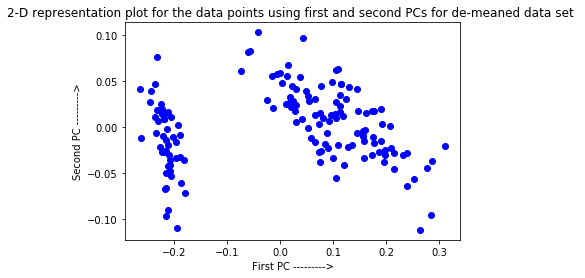

In [70]:
#Question 1 Part 3
#2D representation of the data

'''
For the 2D representation for the data points, we need to use the first 2 PCs only
'''

rep2D = np.dot(X,eig_vecs[:,0:2])
plt.plot(rep2D[:,0], rep2D[:,1], 'ob')
plt.xlabel('First PC --------->')
plt.ylabel('Second PC --------->')
plt.title('2-D representation plot for the data points using first and second PCs for de-meaned data set ')
plt.show()

$\textbf{Discussion of the plot}$

In [51]:
#Question 1 Part 3
#Discussion of the plot

print ('(a) Yes, from the above plot of 2D represenatation of data, we have two visually apparent clusters.\n')
print ('(b) Since from Part (2) above, first 2 PCs represent most variance of the data, and we clearly have')
print ('two apparent cluster in the data when we plot the first 2 PCS, we may conjecture that there are mainly 2 distinct ')
print ('species represented by the data.\n')

(a) Yes, from the above plot of 2D represenatation of data, we have two visually apparent clusters.

(b) Since from Part (2) above, first 2 PCs represent most variance of the data, and we clearly have
two apparent cluster in the data when we plot the first 2 PCS, we may conjecture that there are mainly 2 distinct 
species represented by the data.



$\textbf{Question 1 Part 4 }$

$\textbf{PCA with standardized data}$

In [52]:
#Question 1 Part 4
#PCA with standardization

#Divide by Standard Deviation the de-meaned data using coloumn Standard Deviations
Standard = De_mean/De_mean.std(axis=0)

#Scaling the data by sqrt(n-1)
X_standard = 1/np.sqrt(149)*Standard

#Computing the covariance matrix standardized matrix X^T.X
cov_standard = np.dot(np.transpose(X_standard),X_standard)

#Computing the eigen values and eigen vectors for covariance matrix
eig_val_std,eig_vecs_std = np.linalg.eig(cov_standard)

#The eigen vectors of the covariance matrix for the de-meaned data give the Principal components 
print ('First Principal component is:\n', eig_vecs_std[:,0])
print ('\nSecond Principal component is:\n', eig_vecs_std[:,1])
print ('\nThird Principal component is:\n', eig_vecs_std[:,2])
print ('\nFourth Principal component is:\n', eig_vecs_std[:,3])

First Principal component is:
 [ 0.52237162 -0.26335492  0.58125401  0.56561105]

Second Principal component is:
 [-0.37231836 -0.92555649 -0.02109478 -0.06541577]

Third Principal component is:
 [-0.72101681  0.24203288  0.14089226  0.6338014 ]

Fourth Principal component is:
 [ 0.26199559 -0.12413481 -0.80115427  0.52354627]


$\textbf{Matrix with 4 PCs and their associated variance}$

In [66]:
#Matrix with four PCs
print ('Matrix with 4 PCs:\n', eig_vecs_std)

Matrix with 4 PCs:
 [[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]


In [68]:
#Eigenvalues of the Covariance matrix
#Variance in the Principal components
print ('Eigenvalues of the Covariance Matrix are:', eig_val_std)

Eigenvalues of the Covariance Matrix are: [ 2.91081808  0.92122093  0.14735328  0.02060771]


$\textbf{Portion of the variance contained in each of the PCs}$

In [59]:
#Portion of the variance contained in each of the PCs

'''
Ratio of each eigen value to the total sum of all eigen values 
gives portion of variance explained by each PC
'''

var_portion_std = eig_val_std/eig_val_std.sum()

print ('Portion of variance in First PC:', var_portion_std[0])
print ('\nPortion of variance in Second PC:', var_portion_std[1])
print ('\nPortion of variance in Third PC:', var_portion_std[2])
print ('\nPortion of variance in Fourth PC:', var_portion_std[3])

#True components needed to represent the data
print ('\nWe can observe that 72.77% of variance in data is contained in the first PC, 23.03% of variance in data')
print ('is contained in the second PC and other components have very less portion of variance.')
print ('\nHence, We can conclude that only 2 true components are needed to represent the data, together containing')
print ('95.8% of variance in data')

Portion of variance in First PC: 0.727704520938

Portion of variance in Second PC: 0.230305232677

Portion of variance in Third PC: 0.0368383195763

Portion of variance in Fourth PC: 0.00515192680891

We can observe that 72.77% of variance in data is contained in the first PC, 23.03% of variance in data
is contained in the second PC and other components have very less portion of variance.

Hence, We can conclude that only 2 true components are needed to represent the data, together containing
95.8% of variance in data


$\textbf{2-D representation of the data}$

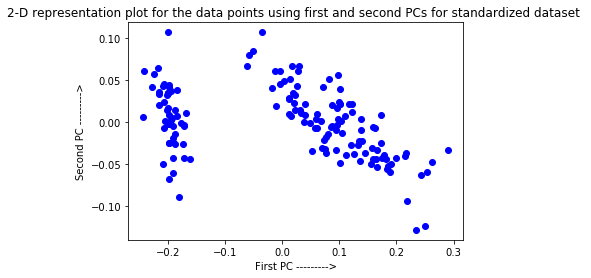

In [69]:
#2D representation of the data

'''
For the 2D representation for the data points, we need to use the first 2 PCs only
'''

rep2D_std = np.dot(X,eig_vecs_std[:,0:2])
plt.plot(rep2D_std[:,0], rep2D_std[:,1], 'ob')
plt.xlabel('First PC --------->')
plt.ylabel('Second PC --------->')
plt.title('2-D representation plot for the data points using first and second PCs for standardized dataset ')
plt.show()

$\textbf{Discussion of the plot}$

In [62]:
#Discussion of the plot

print ('(a) Yes, from the above plot of 2D represenatation of data, we have two visually apparent clusters.\n')
print ('(b) Since from Part (2) above, first 2 PCs represent most variance of the data, and we clearly have')
print ('two apparent cluster in the data when we plot the first 2 PCS, we may conjecture that there are mainly 2 distinct ')
print ('species represented by the data.\n')

(a) Yes, from the above plot of 2D represenatation of data, we have two visually apparent clusters.

(b) Since from Part (2) above, first 2 PCs represent most variance of the data, and we clearly have
two apparent cluster in the data when we plot the first 2 PCS, we may conjecture that there are mainly 2 distinct 
species represented by the data.



$\textbf{Discussion of both analysis}$

In [77]:
#True components needed to represent data comparision
print ('Without standardization, first PC contained 92.46% of variance in data and only 1 component was enough to represent data')
print ('\nWith standardization, first PC contains 72.77% of variance in data, second PC contains 23.03% of variance in data,')
print ('together containing 95.8% of variance in data and only 2 true components are needed to represent the data')

#No. of clusters comparision 
print ('\nIn 2D representation of data, we got 2 distinct clusters in both the cases.')
print ('We may conclude that there are mainly 2 distinct species represented by the data using both the analysis results.\n')

Without standardization, first PC contained 92.46% of variance in data and only 1 component was enough to represent data

With standardization, first PC contains 72.77% of variance in data, second PC contains 23.03% of variance in data,
together containing 95.8% of variance in data and only 2 true components are needed to represent the data

In 2D representation of data, we got 2 distinct clusters in both the cases.
We may conclude that there are mainly 2 distinct species represented by the data using both the analysis results.

